In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendars import get_calendar

In [3]:
bundle_data = bundles.load("quandl")

In [4]:
end_date = pd.Timestamp("2019-01-01", tz="utc")

In [5]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00+0000', tz='UTC')

In [6]:
data_por = DataPortal(
    asset_finder=bundle_data.asset_finder, 
    trading_calendar=get_calendar("NYSE"),
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader=bundle_data.equity_daily_bar_reader
)

In [7]:
TSLA = data_por.asset_finder.lookup_symbol(
    "TSLA",
    as_of_date=None
)

In [8]:
df = data_por.get_history_window(
    assets=[TSLA],
    end_dt=end_date,
    bar_count=5000,
    frequency='1d',
    data_frequency='daily',
    field="close"
)

In [9]:
df.head()

,Equity(2862 [TSLA])
1999-02-22 00:00:00+00:00,NaN
1999-02-23 00:00:00+00:00,NaN
1999-02-24 00:00:00+00:00,NaN
1999-02-25 00:00:00+00:00,NaN
1999-02-26 00:00:00+00:00,NaN


In [10]:
df.describe()

,Equity(2862 [TSLA])
count,1949.000000
mean,158.641122
std,111.041317
min,15.800000
25%,31.600000
50%,192.690000
75%,240.240000
max,385.000000


In [11]:
df = df.dropna()

In [12]:
df.index = pd.DatetimeIndex(df.index)

In [13]:
list(df.columns)[0]

Equity(2862 [TSLA])

In [14]:
df['close'] = df[list(df.columns)[0]]

In [15]:
df.head()

,Equity(2862 [TSLA]),close
2010-06-29 00:00:00+00:00,23.89,23.89
2010-06-30 00:00:00+00:00,23.83,23.83
2010-07-01 00:00:00+00:00,21.96,21.96
2010-07-02 00:00:00+00:00,19.20,19.20
2010-07-06 00:00:00+00:00,16.11,16.11


In [16]:
df = df.drop(columns=[list(df.columns)[0]])

In [17]:
df.head()

,close
2010-06-29 00:00:00+00:00,23.89
2010-06-30 00:00:00+00:00,23.83
2010-07-01 00:00:00+00:00,21.96
2010-07-02 00:00:00+00:00,19.20
2010-07-06 00:00:00+00:00,16.11


In [18]:
df.tail()

,close
2018-03-21 00:00:00+00:00,316.53
2018-03-22 00:00:00+00:00,309.10
2018-03-23 00:00:00+00:00,301.54
2018-03-26 00:00:00+00:00,304.18
2018-03-27 00:00:00+00:00,279.18


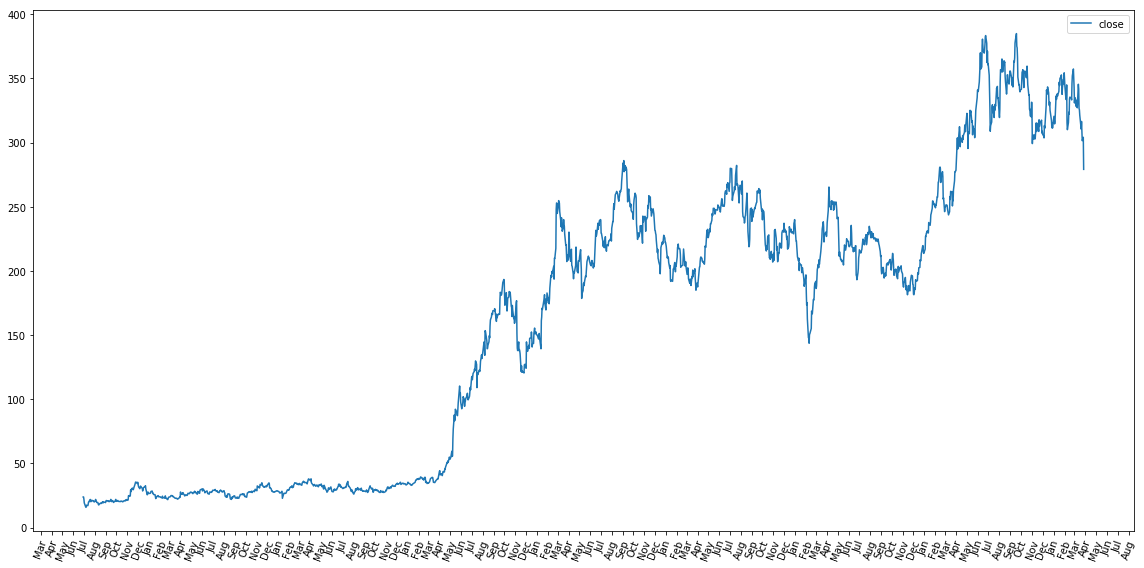

In [19]:
from matplotlib.dates import MonthLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(df.index, df.close)

lctr = MonthLocator()  # every month
frmt = DateFormatter('%b')  # %b gives us Jan, Feb...

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

In [20]:
df['1d'] = df.shift(-1)

In [21]:
df.head()

,close,1d
2010-06-29 00:00:00+00:00,23.89,23.83
2010-06-30 00:00:00+00:00,23.83,21.96
2010-07-01 00:00:00+00:00,21.96,19.20
2010-07-02 00:00:00+00:00,19.20,16.11
2010-07-06 00:00:00+00:00,16.11,15.80


In [22]:
for d in range(2, 41):
    col = "%dd" % d
    df[col] = df['close'].shift(-1 * d)
df.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2010-06-29 00:00:00+00:00,23.89,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,...,17.60,18.32,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90
2010-06-30 00:00:00+00:00,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,...,18.32,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75
2010-07-01 00:00:00+00:00,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,...,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70
2010-07-02 00:00:00+00:00,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,...,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70,19.87
2010-07-06 00:00:00+00:00,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,21.91,...,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70,19.87,19.48


In [23]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-03-21 00:00:00+00:00,316.53,309.10,301.54,304.18,279.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-22 00:00:00+00:00,309.10,301.54,304.18,279.18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-23 00:00:00+00:00,301.54,304.18,279.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 00:00:00+00:00,304.18,279.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-27 00:00:00+00:00,279.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df.dropna()

In [25]:
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,31d,32d,33d,34d,35d,36d,37d,38d,39d,40d
2018-01-23 00:00:00+00:00,352.79,345.74,337.64,342.85,349.53,345.82,354.42,349.25,343.79,333.70,...,329.10,327.17,345.51,341.84,326.63,325.60,321.35,313.56,310.55,316.53
2018-01-24 00:00:00+00:00,345.74,337.64,342.85,349.53,345.82,354.42,349.25,343.79,333.70,333.63,...,327.17,345.51,341.84,326.63,325.60,321.35,313.56,310.55,316.53,309.10
2018-01-25 00:00:00+00:00,337.64,342.85,349.53,345.82,354.42,349.25,343.79,333.70,333.63,345.00,...,345.51,341.84,326.63,325.60,321.35,313.56,310.55,316.53,309.10,301.54
2018-01-26 00:00:00+00:00,342.85,349.53,345.82,354.42,349.25,343.79,333.70,333.63,345.00,315.36,...,341.84,326.63,325.60,321.35,313.56,310.55,316.53,309.10,301.54,304.18
2018-01-29 00:00:00+00:00,349.53,345.82,354.42,349.25,343.79,333.70,333.63,345.00,315.36,310.11,...,326.63,325.60,321.35,313.56,310.55,316.53,309.10,301.54,304.18,279.18


In [26]:
X = df.iloc[:, :33]
y = df.iloc[:, 33:]
X.head()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,23d,24d,25d,26d,27d,28d,29d,30d,31d,32d
2010-06-29 00:00:00+00:00,23.89,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,...,20.92,21.95,21.26,20.45,19.59,19.60,19.03,17.90,17.60,18.32
2010-06-30 00:00:00+00:00,23.83,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,...,21.95,21.26,20.45,19.59,19.60,19.03,17.90,17.60,18.32,18.78
2010-07-01 00:00:00+00:00,21.96,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,...,21.26,20.45,19.59,19.60,19.03,17.90,17.60,18.32,18.78,19.15
2010-07-02 00:00:00+00:00,19.20,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,...,20.45,19.59,19.60,19.03,17.90,17.60,18.32,18.78,19.15,18.77
2010-07-06 00:00:00+00:00,16.11,15.80,17.46,17.40,17.05,18.14,19.84,19.89,20.64,21.91,...,19.59,19.60,19.03,17.90,17.60,18.32,18.78,19.15,18.77,18.79


In [27]:
y.head()

,33d,34d,35d,36d,37d,38d,39d,40d
2010-06-29 00:00:00+00:00,18.78,19.15,18.77,18.79,19.10,20.13,19.20,19.90
2010-06-30 00:00:00+00:00,19.15,18.77,18.79,19.10,20.13,19.20,19.90,19.75
2010-07-01 00:00:00+00:00,18.77,18.79,19.10,20.13,19.20,19.90,19.75,19.70
2010-07-02 00:00:00+00:00,18.79,19.10,20.13,19.20,19.90,19.75,19.70,19.87
2010-07-06 00:00:00+00:00,19.10,20.13,19.20,19.90,19.75,19.70,19.87,19.48


Sci-Kit Learn Train Test Split [ <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Link</a> ]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [29]:
X_train.shape

(1145, 33)

In [30]:
X_test.shape

(764, 33)

Sci-Kit Learn Random Forest Regressor [<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">Link</a>]

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=16,
    random_state=None,
    verbose=1,
    warm_start=False)
regressor.fit(X_train, y_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=16,
           oob_score=True, random_state=None, verbose=1, warm_start=False)

In [32]:
regressor.score(X_test, y_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9937559891217418

In [33]:
regressor.feature_importances_

array([4.37360226e-04, 4.23007804e-04, 7.36426523e-04, 1.34109931e-03,
       4.49822148e-03, 2.13670780e-03, 3.16946321e-03, 3.20088914e-03,
       1.71961582e-03, 1.55526557e-03, 9.59747317e-04, 4.04375890e-04,
       8.05321058e-04, 1.43498979e-03, 4.46293111e-04, 7.47239676e-04,
       6.04466242e-04, 3.84291678e-04, 2.10709910e-04, 1.13361557e-03,
       8.98234921e-04, 6.56676267e-04, 2.74373633e-04, 5.80788734e-04,
       9.64668274e-04, 6.91878875e-04, 5.01891992e-04, 1.40764351e-03,
       1.68626454e-03, 5.70854270e-04, 1.09033231e-01, 2.50239636e-01,
       6.06144751e-01])

In [34]:
y_test.head()

,33d,34d,35d,36d,37d,38d,39d,40d
2016-04-14 00:00:00+00:00,219.56,218.96,218.990,220.68,232.34,235.52,229.36,218.79
2017-03-20 00:00:00+00:00,308.35,307.00,321.359,325.22,323.10,324.81,315.88,317.01
2017-05-01 00:00:00+00:00,371.40,369.80,372.240,376.40,382.61,383.45,377.49,362.37
2018-01-09 00:00:00+00:00,350.99,343.06,330.930,335.12,333.35,328.20,332.30,329.10
2014-07-09 00:00:00+00:00,262.55,261.74,263.250,263.86,269.70,284.12,281.19,286.04


In [35]:
y_predicted = regressor.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [36]:
y_predicted

array([[222.3935 , 221.4204 , 221.2934 , ..., 223.56655, 224.6889 ,
        224.70902],
       [309.18343, 313.21627, 313.21592, ..., 313.6008 , 315.3659 ,
        317.27041],
       [369.302  , 368.061  , 366.697  , ..., 361.5571 , 359.6798 ,
        359.4615 ],
       ...,
       [ 35.4483 ,  35.32689,  35.4977 , ...,  35.89089,  35.82488,
         35.78809],
       [293.2186 , 296.65532, 294.5107 , ..., 299.31469, 298.1094 ,
        295.5617 ],
       [ 25.1733 ,  25.185  ,  25.3254 , ...,  24.7608 ,  24.9615 ,
         24.7862 ]])

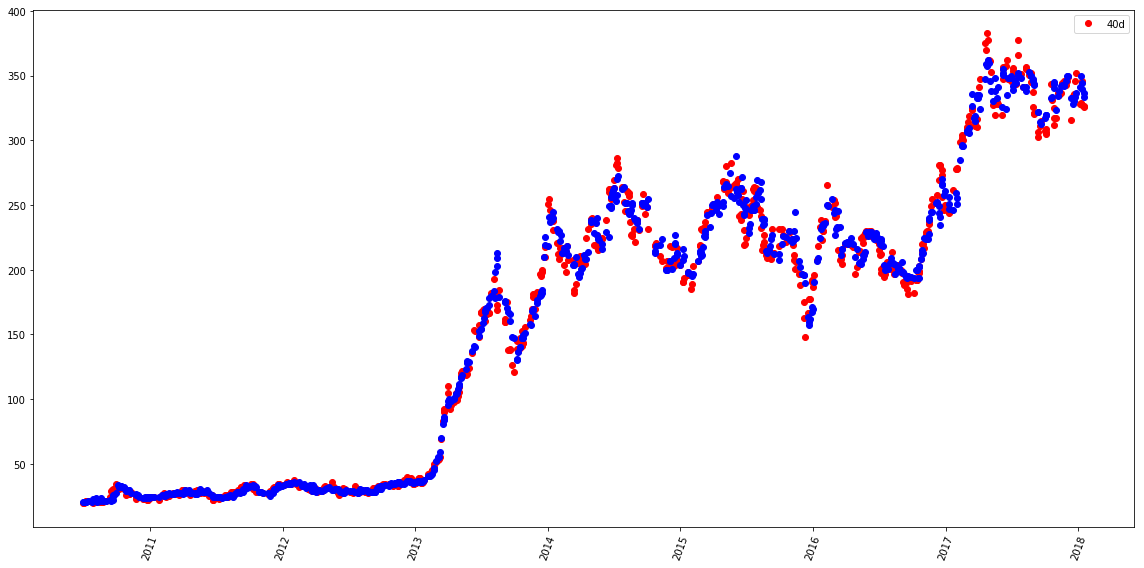

In [37]:
fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(y_test.index, y_test['40d'], 'ro')
ax.plot(y_test.index, y_predicted[:, 7], 'bo')

ax.legend()

plt.xticks(rotation=70)
plt.tight_layout()
plt.show();

In [39]:
from joblib import dump
dump(regressor, 'rf_regressor.joblib')

['rf_regressor.joblib']